In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE
#%matplotlib inline

from sklearn.model_selection import train_test_split

from scipy.stats import norm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import StratifiedShuffleSplit

#DS
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
#KNN
from sklearn.neighbors import KNeighborsClassifier

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 1. Loading the dataset

In [2]:
#loading the data from CSV file 
data=pd.read_csv('Data/final_Binary.csv')
data.head()


,Adult Occupant,Belt Pretensioner-Rear,Safety Assist,Child Occupant,Class,Side Pelvis Airbag-Rear,AEB Vulnerable Road Users,Rate
0,84.0,0,81.0,89.0,4,2,0,1
1,87.0,0,88.0,87.0,10,2,0,1
2,75.0,0,69.0,84.0,12,2,0,0
3,84.0,0,84.0,90.0,6,2,0,1
4,84.0,0,85.0,89.0,4,2,0,1


In [3]:
# print the columns in the dataset
data.columns

Index(['Adult Occupant', 'Belt Pretensioner-Rear', 'Safety Assist',
       'Child Occupant', 'Class', 'Side Pelvis Airbag-Rear',
       'AEB Vulnerable Road Users', 'Rate'],
      dtype='object')

In [4]:

dataFeatures= ['Adult Occupant', 'Belt Pretensioner-Rear', 'Safety Assist',
       'Child Occupant', 'Class', 'Side Pelvis Airbag-Rear',
       'AEB Vulnerable Road Users']

## 2. Smoot 

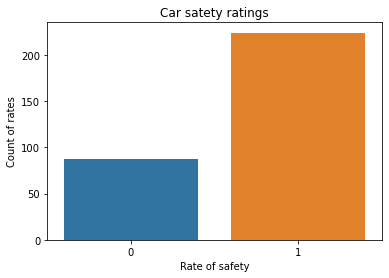

In [5]:
#Data presentation 

sns.countplot(data["Rate"])
plt.xlabel("Rate of safety")
plt.ylabel("Count of rates")
plt.title("Car satety ratings")
plt.show()

after smote


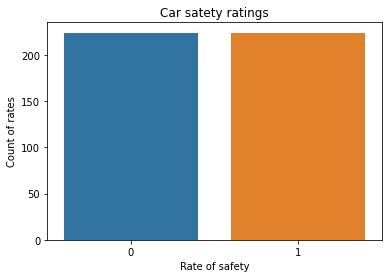

In [6]:
X= data.loc[:,dataFeatures]
y= data.loc[:,["Rate"]]

flg = False

if flg :
    # smote = SMOTE(sampling_strategy=0.5)
    smote = SMOTE(sampling_strategy='minority')
    x_sm, y_sm = smote.fit_resample(X, y)

    x_sm.to_csv('Data/x_sm.csv')
    y_sm.to_csv('Data/y_sm.csv')
else :
    x_sm = pd.read_csv('Data/x_sm.csv')
    y_sm = pd.read_csv('Data/y_sm.csv')

    x_sm = x_sm.loc[:,dataFeatures]
    y_sm = y_sm.loc[:,["Rate"]]


print("after smote")
sns.countplot(y_sm["Rate"])
plt.xlabel("Rate of safety")
plt.ylabel("Count of rates")
plt.title("Car satety ratings")
plt.show()

## 3. Split the dataset 

In [7]:
X_train, X_test, y_train, y_test = train_test_split( x_sm, y_sm , test_size=.2, random_state= 1, stratify= y_sm)

print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (358, 7), y_train: (358, 1)
Testing dataset shape, X_test: (90, 7), y_test: (90, 1)


## 4. Data normalization 

In [8]:
y_train.value_counts(normalize=True)

Rate
0       0.5
1       0.5
dtype: float64

In [9]:
y_test.value_counts(normalize=True)

Rate
0       0.5
1       0.5
dtype: float64

## 4. Models 

### 4.1 Decision Tree 

before optimization

In [10]:
# DecisionTreeClassifier
#importing the classfier
clf=DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)
print('Training accuracy : ' ,  clf.score(X_train, y_train))


pre = clf.predict(X_test)
print('Testing accuracy : ' ,clf.score(X_test,y_test))


Training accuracy :  1.0
Testing accuracy :  0.9333333333333333


In [11]:
metrics_B=[]
precision, recall, fscore, _ = score(y_test, clf.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, clf.predict(X_test))
metrics_B.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

After optimization

In [12]:
# DecisionTree opt


#optimization
param_grid={
"max_depth":[2,4,6],
"min_samples_split":[2,5,10],
"min_samples_leaf":[1,2,4]}


grid_search= GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)

# splitTrain(grid_search)


grid_search.fit(X_train,y_train)
print('Training accuracy : ' ,  grid_search.score(X_train, y_train))


pre = grid_search.predict(X_test)
print('Testing accuracy : ' , grid_search.score(X_test,y_test))

Training accuracy :  0.9776536312849162
Testing accuracy :  0.9333333333333333


In [13]:
metrics_A=[]
precision, recall, fscore, _ = score(y_test, grid_search.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
metrics_A.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

In [14]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=0)


### 4.2 KNN

Before optimization

In [15]:
# KNN
#importing the classfier

kCls=KNeighborsClassifier()

kCls.fit(X_train,y_train)
print('Training accuracy : ' ,  kCls.score(X_train, y_train))


pre = kCls.predict(X_test)
print('Testing accuracy : ' , kCls.score(X_test,y_test))



Training accuracy :  0.9608938547486033
Testing accuracy :  0.8666666666666667


In [16]:
precision, recall, fscore, _ = score(y_test, kCls.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, kCls.predict(X_test))
metrics_B.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

After optimization

In [17]:
#KNN optimization using brute algorithm 
kCls=KNeighborsClassifier(algorithm="brute")
kCls.fit(X_train,y_train)
print('Training accuracy : ' ,  kCls.score(X_train, y_train))


pre = kCls.predict(X_test)
print('Testing accuracy : ' , kCls.score(X_test,y_test))


Training accuracy :  0.9608938547486033
Testing accuracy :  0.8666666666666667


In [18]:

precision, recall, fscore, _ = score(y_test, kCls.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, kCls.predict(X_test))
metrics_A.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

### 4.3 GradientBoosting

Before optimization

In [19]:
# GradientBoostingClassifier
#importing the classfier

gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train,y_train)
print('Training accuracy : ' ,  gb_clf.score(X_train, y_train))


pre = gb_clf.predict(X_test)
print('Training accuracy : ' , gb_clf.score(X_test,y_test))




Training accuracy :  0.9972067039106145
Training accuracy :  0.9444444444444444


In [20]:
precision, recall, fscore, _ = score(y_test, gb_clf.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, gb_clf.predict(X_test))
metrics_B.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

After optimization

In [21]:
# # optimizing the GradientBoostingClassifier using RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {"loss":["deviance"],
                "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                "max_depth":[3,5,8],
                "max_features":["log2","sqrt"],
                "criterion": ["friedman_mse",  "mae"],
                "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
                "n_estimators":[10]}
            
gb = GradientBoostingClassifier()
opt_gb_clf = GridSearchCV(estimator= gb, 
                    param_grid= parameters, 
                    cv= 2,
                    n_jobs= -1)

opt_gb_clf.fit(X_train,y_train)
# splitTrain(opt_gb_clf)


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'], 'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]})

In [22]:

print('Training accuracy : ' ,  opt_gb_clf.score(X_train, y_train))


pre = opt_gb_clf.predict(X_test)
print('Testing accuracy : ' , opt_gb_clf.score(X_test,y_test))

Training accuracy :  0.9664804469273743
Testing accuracy :  0.9333333333333333


In [23]:
precision, recall, fscore, _ = score(y_test, opt_gb_clf.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, opt_gb_clf.predict(X_test))
metrics_A.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

In [24]:
print(opt_gb_clf.best_estimator_)

GradientBoostingClassifier(criterion='mae', max_depth=5, max_features='sqrt',
                           n_estimators=10, subsample=0.9)


### 4.4 LogisticRegression

Before optimization

In [25]:
#LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#Grid search cross validation
lr=LogisticRegression()


lr.fit(X_train,y_train)
print('Training accuracy : ' ,  lr.score(X_train, y_train))


pre = lr.predict(X_test)
print('Testing accuracy : ' , lr.score(X_test,y_test))

Training accuracy :  0.8854748603351955
Testing accuracy :  0.8555555555555555


In [26]:
precision, recall, fscore, _ = score(y_test, lr.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, lr.predict(X_test))
metrics_B.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

After optimization

In [27]:

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet"], 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
logreg=LogisticRegression()
op_lr=GridSearchCV(logreg,grid,cv=10)


op_lr.fit(X_train,y_train)
print('Training accuracy : ' ,  op_lr.score(X_train, y_train))


pre = op_lr.predict(X_test)
print('Testing accuracy : ' , op_lr.score(X_test,y_test))

Training accuracy :  0.8966480446927374
Testing accuracy :  0.8666666666666667


In [28]:
precision, recall, fscore, _ = score(y_test, op_lr.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, op_lr.predict(X_test))
metrics_A.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

In [29]:
print(op_lr.best_estimator_)

LogisticRegression(C=100.0, solver='liblinear')


### 4.5 Random Forest

Before optimization

In [30]:
#RandomForestClassifier
RF= RandomForestClassifier(random_state= 0)

RF.fit(X_train,y_train)
print('Training accuracy : ' ,  RF.score(X_train, y_train))


pre = op_lr.predict(X_test)
print('Testing accuracy : ' , RF.score(X_test,y_test))


C:\Users\rayoo\AppData\Local\Temp\ipykernel_4896\3554350103.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


Training accuracy :  1.0
Testing accuracy :  0.9555555555555556


In [31]:
precision, recall, fscore, _ = score(y_test, RF.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, RF.predict(X_test))
metrics_B.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

After optimization

In [32]:

#RandomForest optimization
random_grid={
"max_depth":[2,4,6],
"min_samples_split":[2,5,10],
"min_samples_leaf":[1,2,4]}
random_search= GridSearchCV(estimator=RF,param_grid=random_grid,cv=5)

random_search.fit(X_train,y_train)
print('Training accuracy : ' ,  random_search.score(X_train, y_train))


pre = random_search.predict(X_test)
print('Testing accuracy : ' , random_search.score(X_test,y_test))


c:\Users\rayoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rayoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rayoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rayoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Training accuracy :  0.9608938547486033
Testing accuracy :  0.9111111111111111


In [33]:
precision, recall, fscore, _ = score(y_test, random_search.predict(X_test), average='weighted')
accuracy = accuracy_score(y_test, random_search.predict(X_test))
metrics_A.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

In [34]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=4, random_state=0)


## 5. Evaluation

### 5.1 Before Optimization

In [35]:
metrics_B = pd.concat(metrics_B, axis=1,names=['DecisionTree','KNN','GradientBoosting','LogisticRegression','RandomForest'])


In [36]:
metrics_B.columns=['DecisionTree','KNN','GradientBoosting','LogisticRegression','RandomForest']
metrics_B

,DecisionTree,KNN,GradientBoosting,LogisticRegression,RandomForest
precision,0.934191,0.867392,0.946429,0.855731,0.955556
recall,0.933333,0.866667,0.944444,0.855556,0.955556
fscore,0.933300,0.866601,0.944383,0.855538,0.955556
accuracy,0.933333,0.866667,0.944444,0.855556,0.955556


### 5.2 After Optimization

In [37]:
metrics_A = pd.concat(metrics_A, axis=1,names=['DecisionTree','KNN','GradientBoosting','LogisticRegression','RandomForest'])


In [38]:

metrics_A.columns=['DecisionTree','KNN','GradientBoosting','LogisticRegression','RandomForest']
metrics_A

,DecisionTree,KNN,GradientBoosting,LogisticRegression,RandomForest
precision,0.934191,0.867392,0.934191,0.867392,0.911111
recall,0.933333,0.866667,0.933333,0.866667,0.911111
fscore,0.933300,0.866601,0.933300,0.866601,0.911111
accuracy,0.933333,0.866667,0.933333,0.866667,0.911111
